# Research Question

1. What is the overall churn rate among customers?
2. Does customer tenure (length of time as a customer) affect their likelihood to churn?
3. How do monthly charges impact the probability of customer churn?
4. How does contract type (e.g., month-to-month, one-year, two-year) influence churn rates?
5. How does the chosen payment method (electronic check, mailed check, bank transfer, credit card) affect churn rates?
6. Are customers with multiple lines of service more likely to churn than those with a single line?
7. Does using technical support services correlate with a lower churn rate?
8. Is there a difference in churn rates based on the type of internet service (DSL, fiber optic, no internet)?
9. How does having dependents influence the likelihood of churn?
10. Is the churn rate higher among senior citizens compared to younger customers?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

In [2]:
df=pd.read_csv('Churn-Dataset.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,0,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,5,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,0,0,Yes


In [3]:
data_cleaned=df.dropna() # Data Cleaning for missing value
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,0,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,5,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,0,0,Yes


In [4]:
df = df.drop("customerID", axis=1) # Remove the customerID column
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,0,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,5,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,0,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,0,0,Yes


## What is the overall churn rate among customers?

In [5]:
churn_rate = df['Churn'].value_counts(normalize=True)['Yes'] * 100
print(f"Overall Churn Rate: {churn_rate:.2f}%")

Overall Churn Rate: 26.54%


## Does customer tenure affect churn?

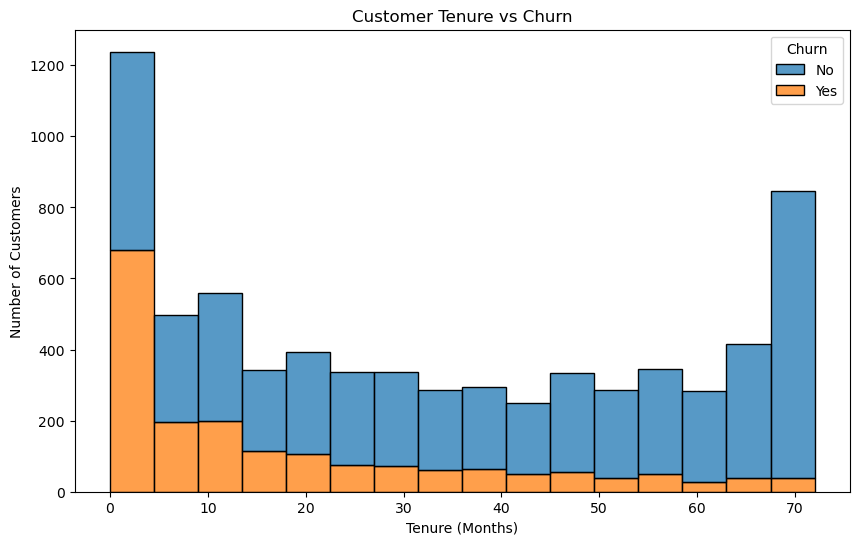

In [6]:
# Plot churn by tenure
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title("Customer Tenure vs Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.show()

## What role does monthly charges play in churn likelihood?

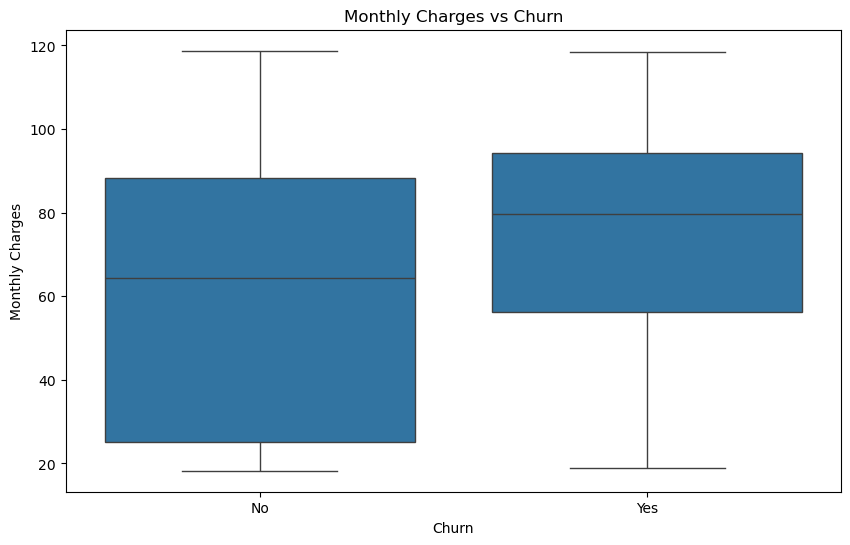

In [7]:
# Plot monthly charges by churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


## Does contract type influence churn?

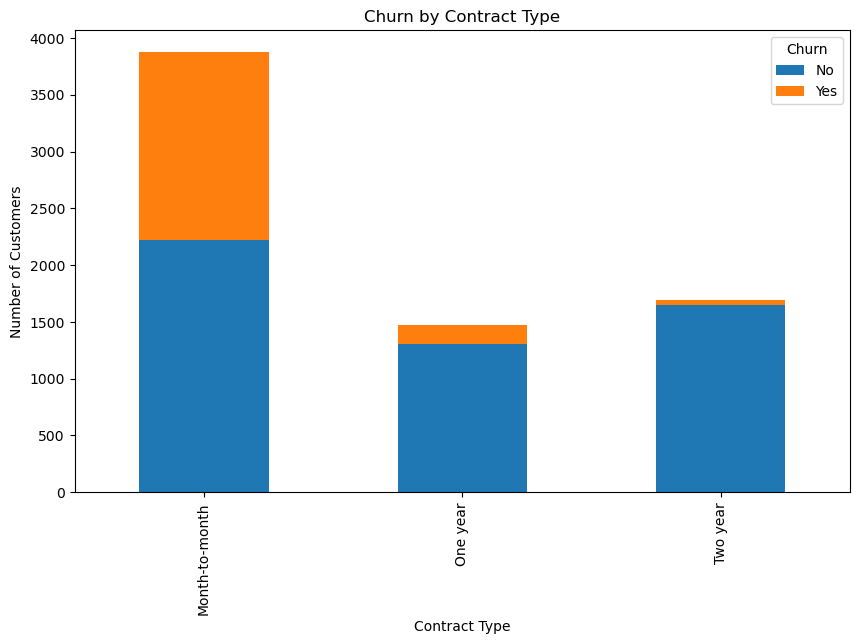

In [8]:
# Count churn by contract type
churn_by_contract = df.groupby(['Contract', 'Churn']).size().unstack()
churn_by_contract.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")
plt.show()

## How does payment method affect churn?

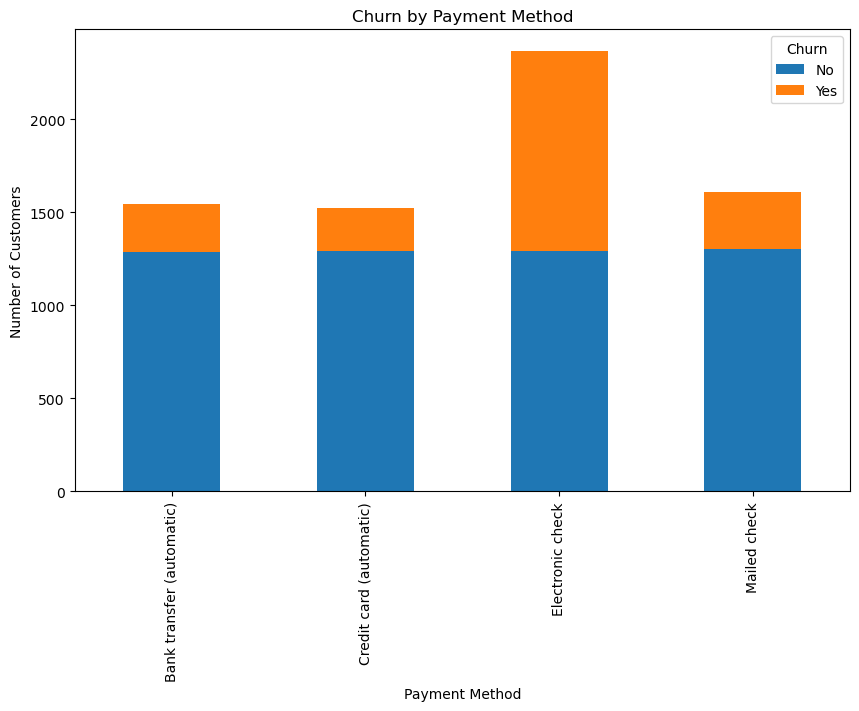

In [9]:
# Count churn by payment method
churn_by_payment = df.groupby(['PaymentMethod', 'Churn']).size().unstack()
churn_by_payment.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Churn by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.show()


## Are customers with multiple lines more likely to churn?

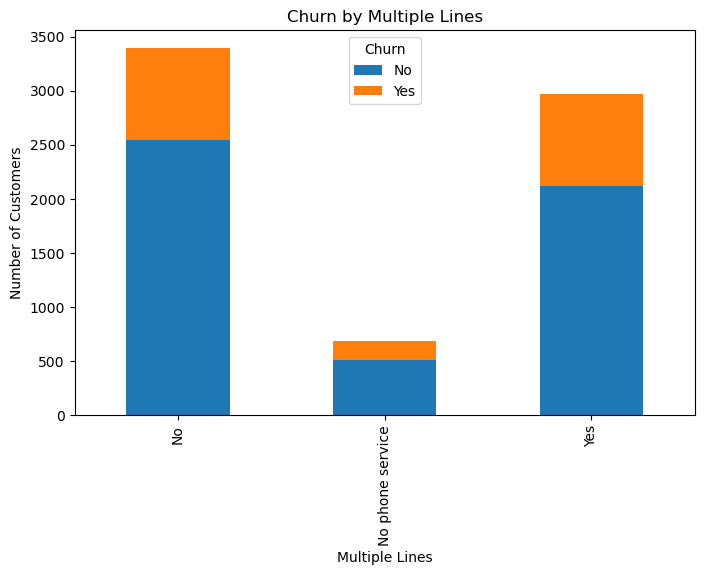

In [10]:
# Count churn by multiple lines
churn_by_lines = df.groupby(['MultipleLines', 'Churn']).size().unstack()
churn_by_lines.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Churn by Multiple Lines")
plt.xlabel("Multiple Lines")
plt.ylabel("Number of Customers")
plt.show()


## Do customers who use tech support churn less?

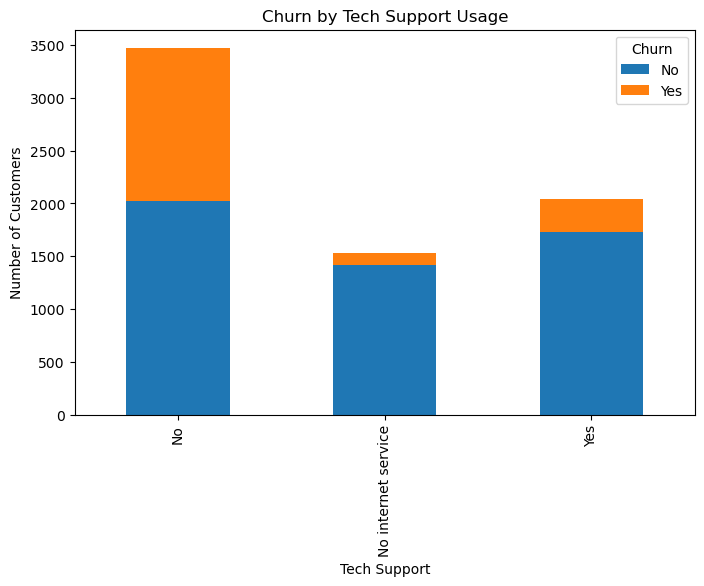

In [11]:
# Count churn by tech support usage
churn_by_tech_support = df.groupby(['TechSupport', 'Churn']).size().unstack()
churn_by_tech_support.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Churn by Tech Support Usage")
plt.xlabel("Tech Support")
plt.ylabel("Number of Customers")
plt.show()


## Is churn related to internet service type?

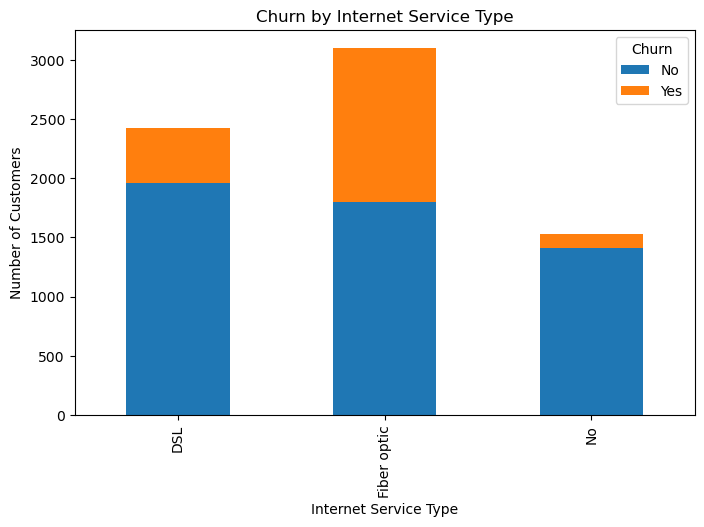

In [12]:
# Count churn by internet service type
churn_by_internet = df.groupby(['InternetService', 'Churn']).size().unstack()
churn_by_internet.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title("Churn by Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Number of Customers")
plt.show()


## How does the presence of dependents affect churn rate?

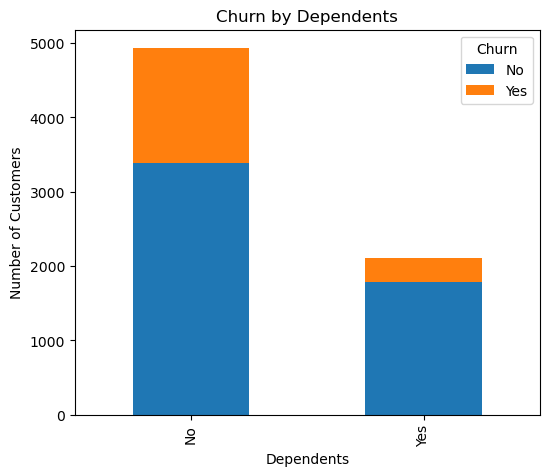

In [13]:
# Count churn by dependents
churn_by_dependents = df.groupby(['Dependents', 'Churn']).size().unstack()
churn_by_dependents.plot(kind='bar', stacked=True, figsize=(6, 5))
plt.title("Churn by Dependents")
plt.xlabel("Dependents")
plt.ylabel("Number of Customers")
plt.show()

## Does the senior citizen demographic have a higher churn rate

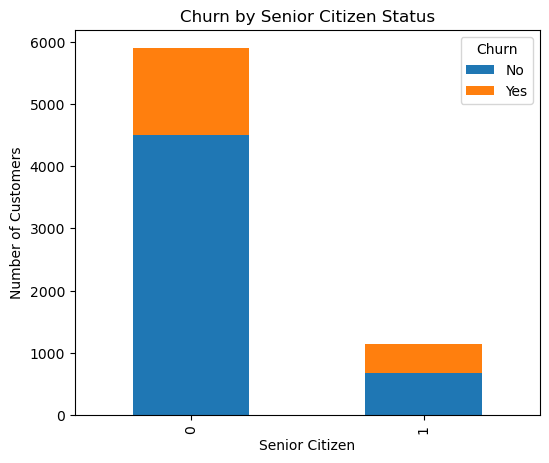

In [14]:
# Count churn by senior citizen status
churn_by_senior = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
churn_by_senior.plot(kind='bar', stacked=True, figsize=(6, 5))
plt.title("Churn by Senior Citizen Status")
plt.xlabel("Senior Citizen")
plt.ylabel("Number of Customers")
plt.show()
